<a href="https://colab.research.google.com/github/trongtin2001/BAITAP_AI/blob/main/CNN_nhandien4loaibanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
!pip install bing-image-downloader

In [2]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_xeo')
downloader.download("bánh hỏi",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_hoi')
downloader.download("bánh ướt",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_uot')
downloader.download("bánh da lợn",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44

In [3]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/test/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.

In [4]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=110,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_da_lon')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation/banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 110 Images on Page 1.


[%] Downloading Image #1 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://delightfulplate.com/wp-content/uploads/2017/11/Vietnamese-Crepes-Banh-Xeo-3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://vietnamtravelinformation.net/wp-content/uploads/2014/06/vietnam-cuisine-banh-xeo.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://foodisafourletterword.com/wp-content/uploads/2018/12/Banh_

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 80 images belonging to 4 classes.
Found 140 images belonging to 4 classes.


In [10]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 80 images belonging to 4 classes.


In [15]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN_4_loai_banh/validation',target_size=(150,150), batch_size=32,class_mode='categorical')

Found 140 images belonging to 4 classes.


In [16]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [17]:
training_data.class_indices

{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [19]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
1/3 [=========>....................] - ETA: 12s - loss: 1.4721 - accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3/3 [==============================] - 20s 7s/step - loss: 23.0519 - accuracy: 0.2250 - val_loss: 1.5556 - val_accuracy: 0.1357
Epoch 2/100
3/3 [==============================] - 17s 8s/step - loss: 1.7786 - accuracy: 0.3375 - val_loss: 0.8570 - val_accuracy: 0.7571
Epoch 3/100
3/3 [==============================] - 17s 6s/step - loss: 1.4022 - accuracy: 0.3875 - val_loss: 1.5266 - val_accuracy: 0.1429
Epoch 4/100
3/3 [==============================] - 17s 6s/step - loss: 1.4115 - accuracy: 0.1750 - val_loss: 1.3407 - val_accuracy: 0.2000
Epoch 5/100
3/3 [==============================] - 17s 7s/step - loss: 1.2760 - accuracy: 0.4125 - val_loss: 1.2659 - val_accuracy: 0.4214
Epoch 6/100
3/3 [==============================] - 17s 6s/step - loss: 1.1779 - accuracy: 0.4875 - val_loss: 0.8341 - val_accuracy: 0.8286
Epoch 7/100
3/3 [==============================] - 17s 6s/step - loss: 1.0182 - accuracy: 0.5625 - val_loss: 1.1804 - val_accuracy: 0.4500
Epoch 8/100
3/3 [=====================

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Sai số kiểm tra là:  0.8267348408699036
Độ chính xác kiểm tra là:  0.8285714387893677


<function matplotlib.pyplot.show>

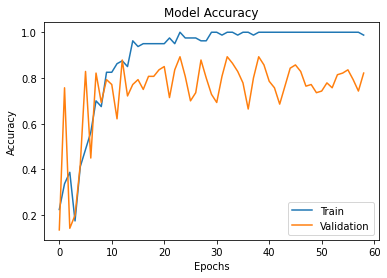

In [20]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [21]:
model.save("CNN_4_loai_banh.h5")

In [22]:
model=load_model('CNN_4_loai_banh.h5')

banh_xeo


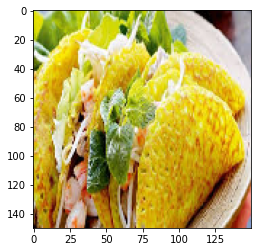

In [24]:
img=load_img("/content/images (9).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='banh_da_lon'
if round(result[0][1])==1:
  prediction='banh_hoi'
if round(result[0][2])==1:
  prediction='banh_uot'
if round(result[0][3])==1:
  prediction='banh_xeo'
print(prediction)